# 0.0 Import

In [1]:
import pickle
import numpy        as np
import pandas       as pd
import scikitplot   as skplt
import xgboost      as xgb

from matplotlib import pyplot as plt

from IPython.display import HTML

from sklearn import neighbors       as nh
from sklearn import linear_model    as lm

from sklearn.ensemble       import ExtraTreesClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.naive_bayes    import GaussianNB

## 0.1 Help Functions

In [2]:
# Supressão de Notação Científica
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.6f}'.format)

In [3]:
# Corrigir Gráficos Jupter

#def jupyter_settings():
#    %matplotlib inline
#
#    plt.style.use( 'bmh' )
#    plt.rcParams['figure.figsize'] = [16, 12]
#    plt.rcParams['font.size'] = 12
#
#    display( HTML( '<style>.container { width:100% !important; }</style>') )
#    pd.options.display.max_columns = None
#    pd.options.display.max_rows = None
#    pd.set_option( 'display.expand_frame_repr', False )
#
#jupyter_settings()

## 0.2 Load processed data

In [4]:
x_treino = pickle.load( open( '../data/processed/x_treino.pkl', 'rb' ) )
y_treino = pickle.load( open( '../data/processed/y_treino.pkl', 'rb' ) )

x_validacao = pickle.load( open( '../data/processed/x_validacao.pkl', 'rb' ) )
y_validacao = pickle.load( open( '../data/processed/y_validacao.pkl', 'rb') )

# 1.0 Modelos de Machine Learning

## 1.1 KNN

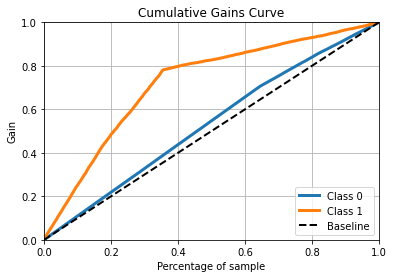

In [5]:
knn_model = nh.KNeighborsClassifier( n_neighbors=5 )

knn_model.fit(x_treino, y_treino)

yhat_knn = knn_model.predict_proba(x_validacao)

knn_metrica = skplt.metrics.plot_cumulative_gain(y_validacao, yhat_knn)

## 1.2 Logistic Regression

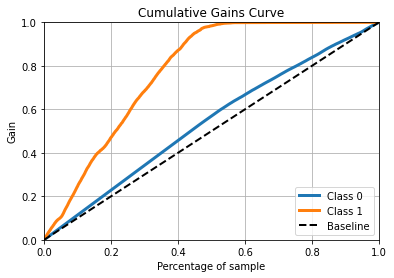

In [6]:
lr_model = lm.LogisticRegression(random_state= 42)

lr_model.fit(x_treino, y_treino)

yhat_lr = lr_model.predict_proba(x_validacao)

lr_metrica = skplt.metrics.plot_cumulative_gain(y_validacao, yhat_lr)

## 1.3 Random Forest

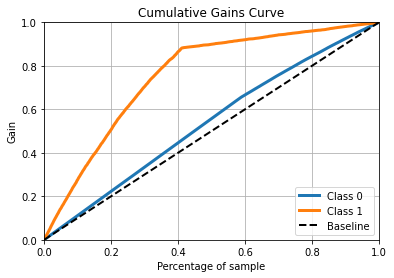

In [7]:
rf_model = RandomForestClassifier(n_estimators = 10, random_state = 42)

rf_model.fit(x_treino, y_treino)

yhat_rf = rf_model.predict_proba(x_validacao)

rf_metrica = skplt.metrics.plot_cumulative_gain(y_validacao, yhat_rf)

## 1.4 Extra Trees Classifier

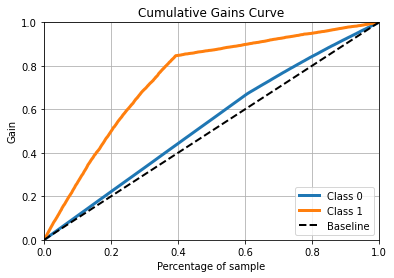

In [8]:
et_model = ExtraTreesClassifier( n_estimators = 10, n_jobs=-1, random_state = 42)

et_model.fit(x_treino, y_treino)

yhat_et = et_model.predict_proba(x_validacao)

et_metrica = skplt.metrics.plot_cumulative_gain(y_validacao, yhat_et)

## 1.5 XGBoost

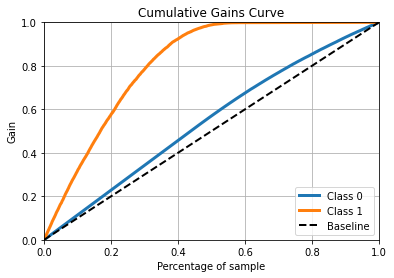

In [9]:
xgb_model = xgb.XGBClassifier()

xgb_model.fit(x_treino, y_treino)

yhat_xgb = xgb_model.predict_proba(x_validacao)

xgb_metrica = skplt.metrics.plot_cumulative_gain(y_validacao, yhat_xgb)

## 1.6 Naive Bayes

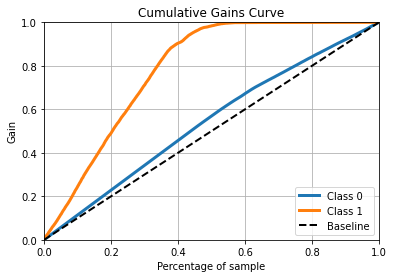

In [10]:
gnv_model = GaussianNB()

gnv_model.fit(x_treino, y_treino)

yhat_gnv = gnv_model.predict_proba(x_validacao)

gnv_metrica = skplt.metrics.plot_cumulative_gain(y_validacao, yhat_gnv)

## 2.0 Performance dos Modelos

In [11]:
def precision_at_k (data, k=2000 ):

    data['ranking'] = data.index +1

    data['precision_at_k'] = data['response'].cumsum() / data['ranking']

    return data.loc[k, 'precision_at_k']

In [12]:
def recall_at_k (data, k=2000 ):

    data['ranking'] = data.index +1

    data['recall_at_k'] = data['response'].cumsum() / data['response'].sum()

    return data.loc[k, 'recall_at_k']

In [13]:
df6 = pickle.load( open( '../data/interim/x_validacao.pkl', 'rb' ) )

df6['response'] = y_validacao.copy()

df6['score'] = yhat_knn[:,1].tolist()

df6.sort_values(by='score', ascending=False, inplace=True)

# Recriando tabela conforme na aula
df6 = df6[['response', 'score']].reset_index()
df6.rename(columns={'index':'id'}, inplace=True)

In [14]:
precision_at_50 = precision_at_k(df6, k=50)
print(precision_at_50)

recall_at_50 = recall_at_k(df6, k=50)
print(recall_at_50)

0.37254901960784315
0.0019951695894151003
